<h2 style="color: #F72585;">Real-Time Object Detection with YOLO: Rock-Paper-Scissors Using Webcam</h1>


<p style="color: #c9184a; font-weight: bold;">Best model link:</p>

https://drive.google.com/file/d/1Rm6RK8fJV2fHSZcnPcDmKbMa-4X_u0dJ/view?usp=sharing

In [13]:
import cv2
import pandas as pd
import numpy as np
from ultralytics import YOLO

# Load the pre-trained YOLO model
model = YOLO('best.pt')

# Start capturing video from the default camera
cap = cv2.VideoCapture(0)

# Define the classes
classes = ['Paper', 'Rock', 'Scissors']

while True:
    # Read a frame from the camera
    ret, frame = cap.read()
    if not ret:
        break
    
    # Resize the frame for consistent processing
    frame = cv2.resize(frame, (1020, 500))

    # Use the model to predict objects in the frame
    results = model.predict(frame)

    # Extract the bounding boxes and other information
    boxes = results[0].boxes.xyxy.cpu().numpy()  # Get the [x1, y1, x2, y2] format boxes
    confs = results[0].boxes.conf.cpu().numpy()  # Get the confidence scores
    clss = results[0].boxes.cls.cpu().numpy().astype(int)  # Get the class labels

    for box, conf, cls in zip(boxes, confs, clss):
        if conf > 0.7:  # Only consider detections with confidence > 0.7
            x1, y1, x2, y2 = map(int, box)
            label = f"{classes[cls]}: {conf:.2f}"  # Create label with class and confidence
            
            # Draw the bounding box and label on the frame
            cv2.rectangle(frame, (x1, y1), (x2, y2), (247, 37, 133), 2)
            cv2.putText(frame, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (58, 12, 163), 2)
    
    # Display the frame
    cv2.imshow("RGB", frame)

    # Exit the loop when 'Esc' key is pressed
    if cv2.waitKey(1) & 0xFF == 27:
        break

# Release the video capture and destroy all windows
cap.release()
cv2.destroyAllWindows()



0: 320x640 (no detections), 18.1ms
Speed: 5.2ms preprocess, 18.1ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 27.8ms
Speed: 3.0ms preprocess, 27.8ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 31.0ms
Speed: 3.0ms preprocess, 31.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 16.0ms
Speed: 4.0ms preprocess, 16.0ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 25.5ms
Speed: 3.0ms preprocess, 25.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 34.5ms
Speed: 4.0ms preprocess, 34.5ms inference, 2.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 26.0ms
Speed: 6.0ms preprocess, 26.0ms inference, 1.0ms postprocess per image at shape (1, 3, 320, 640)

0: 320x640 (no detections), 31.0ms
Speed: 4.0ms preprocess, 31.0ms i

<p style="color: #c9184a; font-weight: bold;">Video link to see realtime detection:</p>

https://drive.google.com/file/d/1Rm6RK8fJV2fHSZcnPcDmKbMa-4X_u0dJ/view?usp=sharing

<h2 style="color: #F72585;">YOLO Object Detection: Image Classification and Annotated Result Display


0: 640x640 1 Paper, 37.1ms
Speed: 8.3ms preprocess, 37.1ms inference, 15.5ms postprocess per image at shape (1, 3, 640, 640)


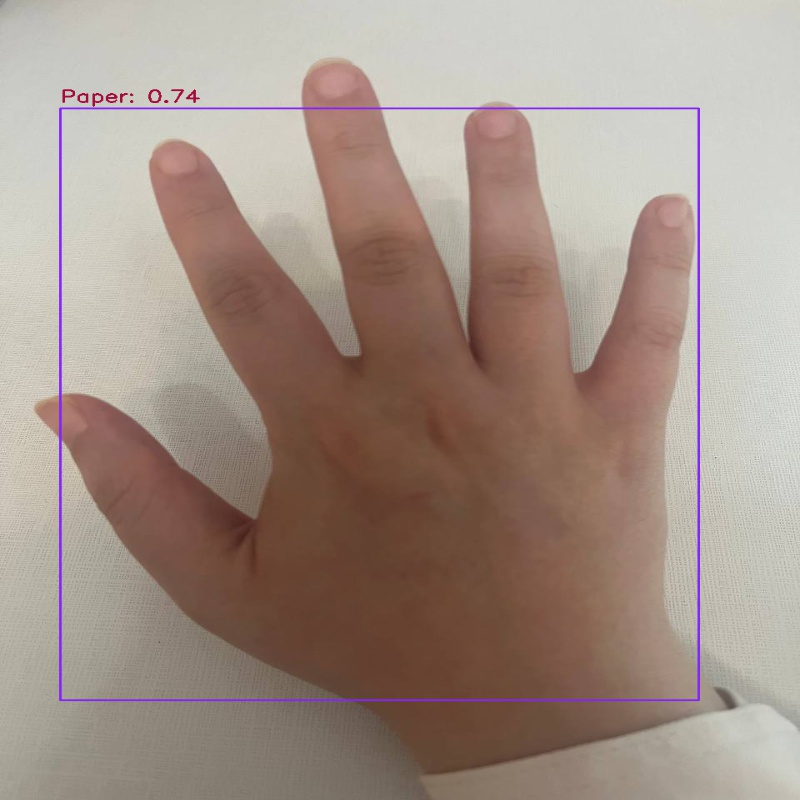

In [9]:
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import Image, display

# Load the pre-trained YOLO model
model = YOLO('best.pt')

# Load an image from file
image_path = 'Paper.jpg'  # Update with the path to your image
image = cv2.imread(image_path)

# Resize the image to be square while maintaining aspect ratio
height, width = image.shape[:2]
new_dim = min(height, width)
start_x = (width - new_dim) // 2
start_y = (height - new_dim) // 2

# Crop the center of the image to make it square
image_cropped = image[start_y:start_y + new_dim, start_x:start_x + new_dim]

# Resize the image for YOLO model input
image_resized = cv2.resize(image_cropped, (640, 640))

# Use the model to predict objects in the image
results = model.predict(image_resized)

# Define the classes
classes = ['Paper', 'Rock', 'Scissors']

# Draw bounding boxes and labels on the original image
for box, conf, cls in zip(results[0].boxes.xyxy.cpu().numpy(), results[0].boxes.conf.cpu().numpy(), results[0].boxes.cls.cpu().numpy().astype(int)):
    if conf > 0.7:  # Only consider detections with confidence > 0.7
        x1, y1, x2, y2 = map(int, box)
        label = f"{classes[cls]}: {conf:.2f}"  # Create label with class and confidence
        
        # Scale bounding box coordinates to original image size
        x1 = int((x1 / 640) * new_dim + start_x)
        y1 = int((y1 / 640) * new_dim + start_y)
        x2 = int((x2 / 640) * new_dim + start_x)
        y2 = int((y2 / 640) * new_dim + start_y)

        # Draw the bounding box and label on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (247, 37, 133), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (58, 12, 163), 2)

# Resize the result image to be smaller
output_size = (800, 800)  # Adjust the size as needed
image_smaller = cv2.resize(image, output_size)

# Save the result image
result_image_path = 'result_image_smaller.jpg'
cv2.imwrite(result_image_path, image_smaller)

# Display the result image
display(Image(filename=result_image_path))


0: 640x640 1 Rock, 18.9ms
Speed: 4.0ms preprocess, 18.9ms inference, 5.0ms postprocess per image at shape (1, 3, 640, 640)


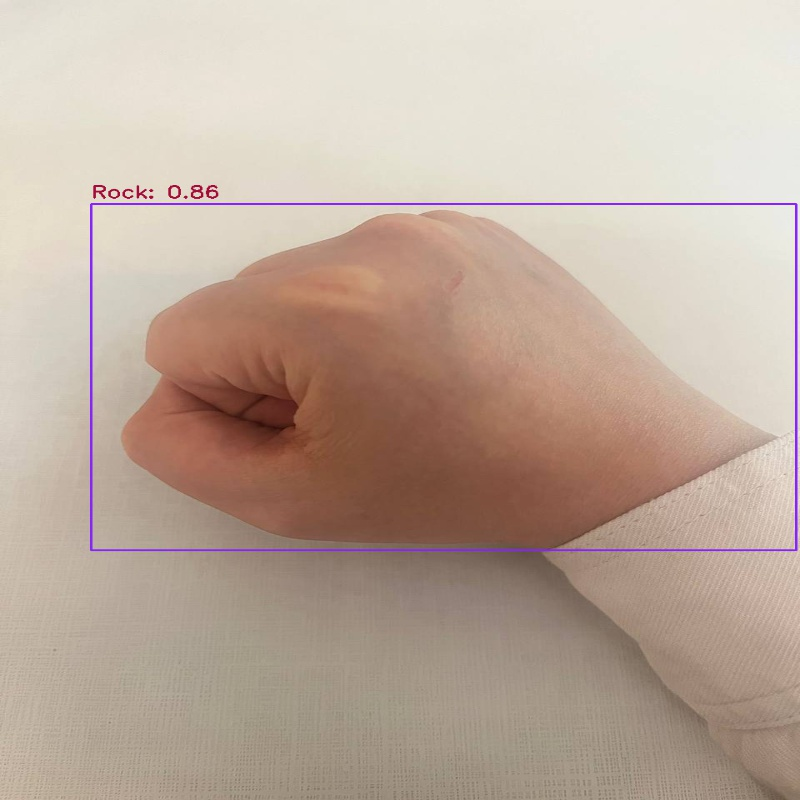

In [10]:
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import Image, display

# Load the pre-trained YOLO model
model = YOLO('best.pt')

# Load an image from file
image_path = 'Rock.jpg'  # Update with the path to your image
image = cv2.imread(image_path)

# Resize the image to be square while maintaining aspect ratio
height, width = image.shape[:2]
new_dim = min(height, width)
start_x = (width - new_dim) // 2
start_y = (height - new_dim) // 2

# Crop the center of the image to make it square
image_cropped = image[start_y:start_y + new_dim, start_x:start_x + new_dim]

# Resize the image for YOLO model input
image_resized = cv2.resize(image_cropped, (640, 640))

# Use the model to predict objects in the image
results = model.predict(image_resized)

# Define the classes
classes = ['Paper', 'Rock', 'Scissors']

# Draw bounding boxes and labels on the original image
for box, conf, cls in zip(results[0].boxes.xyxy.cpu().numpy(), results[0].boxes.conf.cpu().numpy(), results[0].boxes.cls.cpu().numpy().astype(int)):
    if conf > 0.7:  # Only consider detections with confidence > 0.7
        x1, y1, x2, y2 = map(int, box)
        label = f"{classes[cls]}: {conf:.2f}"  # Create label with class and confidence
        
        # Scale bounding box coordinates to original image size
        x1 = int((x1 / 640) * new_dim + start_x)
        y1 = int((y1 / 640) * new_dim + start_y)
        x2 = int((x2 / 640) * new_dim + start_x)
        y2 = int((y2 / 640) * new_dim + start_y)

        # Draw the bounding box and label on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (247, 37, 133), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (58, 12, 163), 2)

# Resize the result image to be smaller
output_size = (800, 800)  # Adjust the size as needed
image_smaller = cv2.resize(image, output_size)

# Save the result image
result_image_path = 'result_image_smaller.jpg'
cv2.imwrite(result_image_path, image_smaller)

# Display the result image
display(Image(filename=result_image_path))


0: 640x640 1 Scissors, 18.6ms
Speed: 4.5ms preprocess, 18.6ms inference, 3.0ms postprocess per image at shape (1, 3, 640, 640)


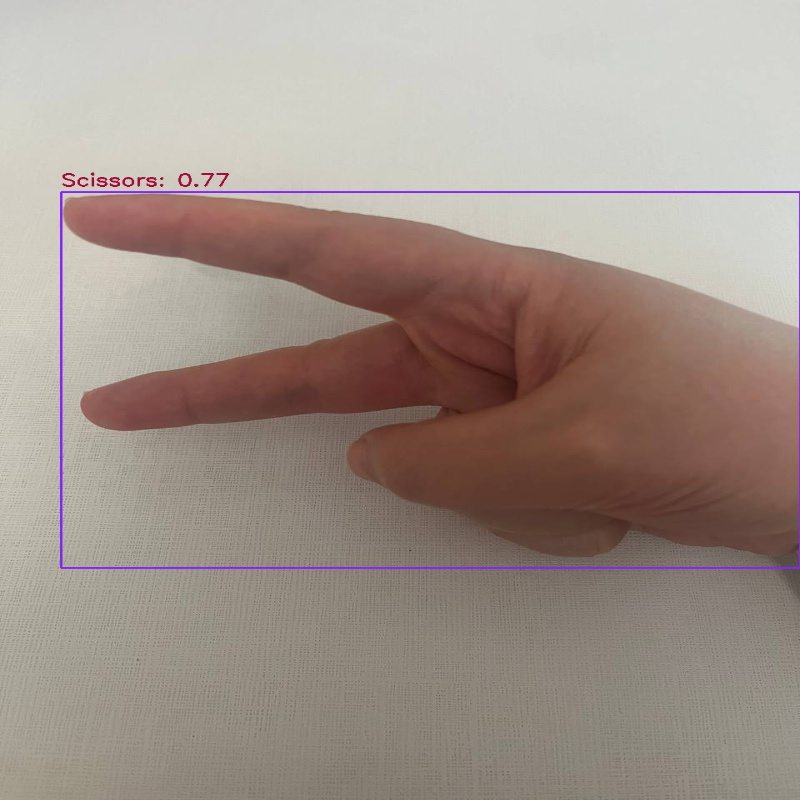

In [11]:
import cv2
import numpy as np
from ultralytics import YOLO
from IPython.display import Image, display

# Load the pre-trained YOLO model
model = YOLO('best.pt')

# Load an image from file
image_path = 'Scissors.jpg'  # Update with the path to your image
image = cv2.imread(image_path)

# Resize the image to be square while maintaining aspect ratio
height, width = image.shape[:2]
new_dim = min(height, width)
start_x = (width - new_dim) // 2
start_y = (height - new_dim) // 2

# Crop the center of the image to make it square
image_cropped = image[start_y:start_y + new_dim, start_x:start_x + new_dim]

# Resize the image for YOLO model input
image_resized = cv2.resize(image_cropped, (640, 640))

# Use the model to predict objects in the image
results = model.predict(image_resized)

# Define the classes
classes = ['Paper', 'Rock', 'Scissors']

# Draw bounding boxes and labels on the original image
for box, conf, cls in zip(results[0].boxes.xyxy.cpu().numpy(), results[0].boxes.conf.cpu().numpy(), results[0].boxes.cls.cpu().numpy().astype(int)):
    if conf > 0.7:  # Only consider detections with confidence > 0.7
        x1, y1, x2, y2 = map(int, box)
        label = f"{classes[cls]}: {conf:.2f}"  # Create label with class and confidence
        
        # Scale bounding box coordinates to original image size
        x1 = int((x1 / 640) * new_dim + start_x)
        y1 = int((y1 / 640) * new_dim + start_y)
        x2 = int((x2 / 640) * new_dim + start_x)
        y2 = int((y2 / 640) * new_dim + start_y)

        # Draw the bounding box and label on the original image
        cv2.rectangle(image, (x1, y1), (x2, y2), (247, 37, 133), 2)
        cv2.putText(image, label, (x1, y1 - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (58, 12, 163), 2)

# Resize the result image to be smaller
output_size = (800, 800)  # Adjust the size as needed
image_smaller = cv2.resize(image, output_size)

# Save the result image
result_image_path = 'result_image_smaller.jpg'
cv2.imwrite(result_image_path, image_smaller)

# Display the result image
display(Image(filename=result_image_path))